In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Calcualte the openning probabilities of voltage gated Ca and K channels (similar to H&H model)
# M is for Ca
# N is for K
# lambda is a way to describe the rate constant (similar to 1/tau in the H&H model)
# V1 - V4 are tuning parameters for steady state openning probability (m_inf and n_inf) and time constant (lambda_m and lambda_n)

def m_inf(v):
  return 0.5*(1 + np.tanh((v - v1)/v2))

def lambda_m(v):
  return lambda_m_bar * np.cosh((v - v1)/(2*v2)) # lambda_bar is the maximum rate constant for m or n (opening of Ca or K)

def n_inf(v):
  return 0.5*(1 + np.tanh((v - v3)/v4))

def lambda_n(v):
  return lambda_n_bar * np.cosh((v - v3)/(2*v4))


In [4]:
def run_simulation(n_timesteps, dt, Cm, gL, gCa, gK, V_0, m_0, n_0, I):

  ECa=100 # mv Na reversal potential
  EK=-70 # mv K reversal potential
  EL=-50 # mv leak reversal potential


  V = np.zeros(t.shape)
  m = np.zeros(t.shape)
  n = np.zeros(t.shape)

  V[0]=V_0
  m[0]=m_0  
  n[0]=n_0
 
  for i in range(n_timesteps-1):
      gL = gL
      # I = g*driving force
      IL = gL * (V[i] - EL) # leak current
      ICa = gCa * m[i] * (V[i] - ECa) # Ca current
      IK = gK * n[i] * (V[i] - EK) # K current

      #Euler method to find the next voltage value
      Vdot = (1/Cm) * (I[i] - (ICa + IK + IL)) # changing rate of V
      V[i+1] = V[i] + dt * Vdot # Euler's method

      mdot = lambda_m(V[i])*(m_inf(V[i]) - m[i])
      m[i+1] = m[i] + dt * mdot
      ndot = lambda_n(V[i])*(n_inf(V[i]) - n[i])
      n[i+1] = n[i] + dt * ndot

  return V, m, n

In [5]:
def display_simulation(t, I, V, m, n):
  plt.figure(figsize = [15,12])
  plt.subplot(4,1,1)
  plt.plot(t, I)
  plt.ylabel('Applied current')
  plt.subplot(4,1,2)
  plt.plot(t, V)
  plt.ylabel('Membrane potential')
  plt.subplot(4,1,3)
  plt.plot(t, m)
  plt.ylabel("m")
  plt.subplot(4,1,4)
  plt.plot(t, n)
  plt.ylabel("n")

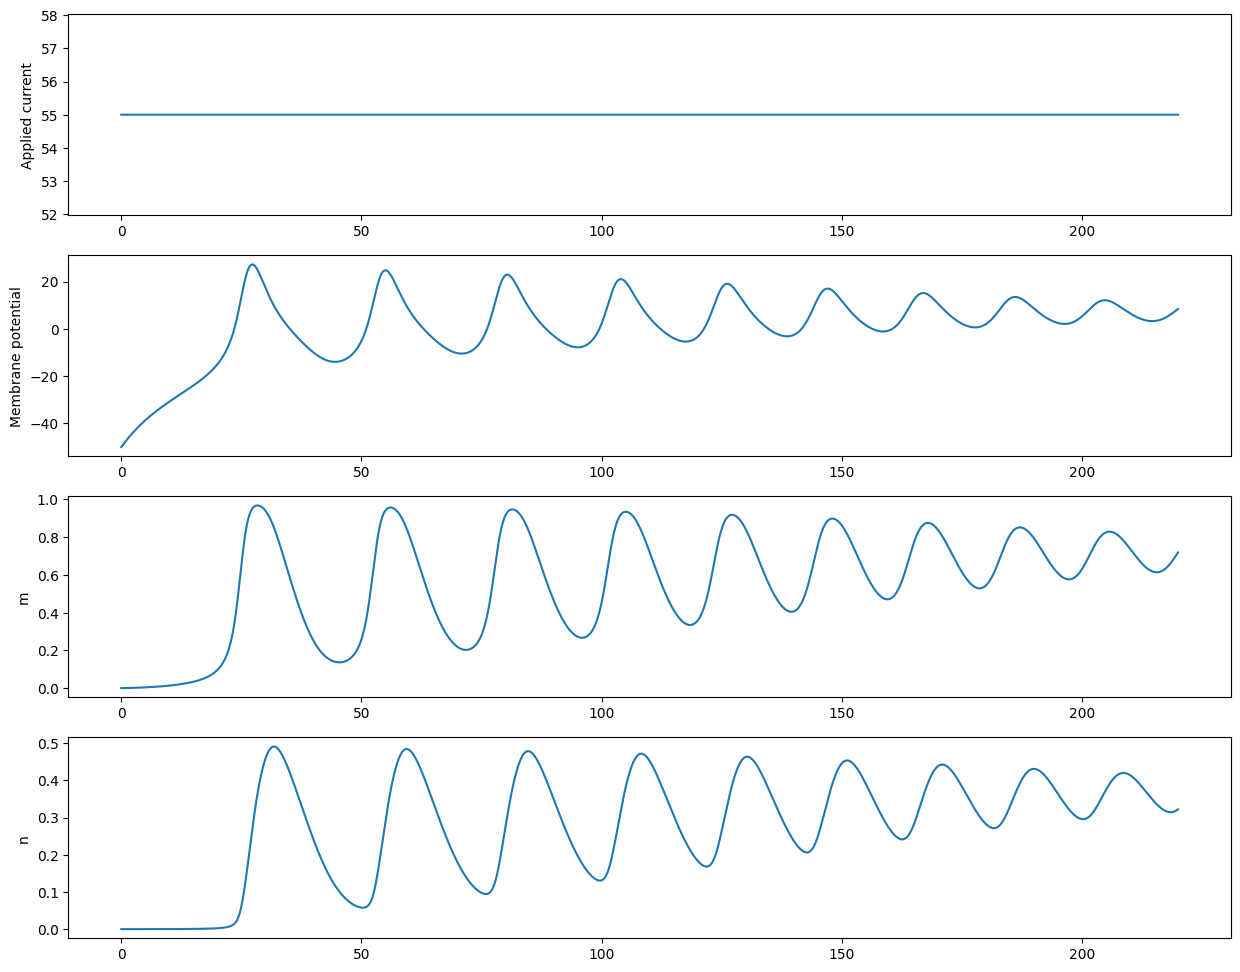

In [6]:
Cm=20  # membrane capacitance (µF/cm^2)
dt=0.01 # Time Step ms
T = 220 # overall simulation time
t=np.arange(0, T+dt, dt) # Time Array ms
n_timesteps = len(t)

gCa=6 # instantaneous Ca conductance (mmho/cm^2)
gK=12 # instantaneous K conductance (mmho/cm^2)
gL=2 # instantaneous leak conductance (mmho/cm^2)

I = np.zeros(t.shape) + 55 # injected current (µA/cm^2)

# tunning parameters (mV)
v1=0
v2=15
v3=10
v4=10

# rate constant (s^-1)
lambda_m_bar = 1
lambda_n_bar = 0.1

# initial values
V_0 = -50 # resting potential (mV)
m_0 = m_inf(V_0) # initial fraction of open Ca channels
n_0 = n_inf(V_0) # initial fraction of open K channels


V, m, n = run_simulation(n_timesteps, dt, Cm, gL, gCa, gK, V_0, m_0, n_0, I)

display_simulation(t,I,V, m, n)
# oscillation was observed!

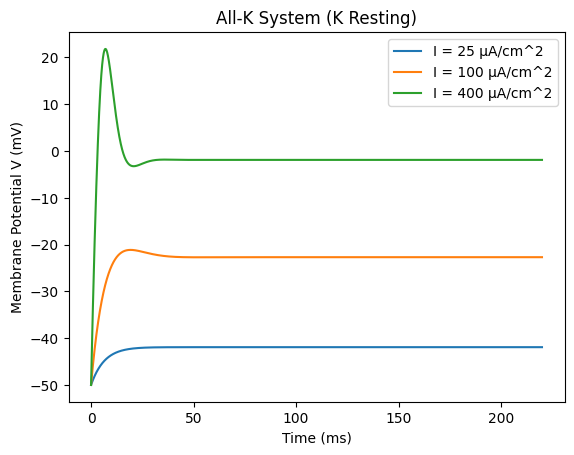

In [7]:
# replicate Figure 2
gCa=0
gK=8
gL=3
lambda_n_bar = 1/15
v3=-1
v4=14.5
I = np.zeros(t.shape) + 25
V, m, n = run_simulation(n_timesteps, dt, Cm, gL, gCa, gK, V_0, m_0, n_0, I)
plt.plot(t, V, label="I = 25 µA/cm^2")
plt.title("All-K System (K Resting)")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential V (mV)")
plt.legend()

I = np.zeros(t.shape) + 100
V, m, n = run_simulation(n_timesteps, dt, Cm, gL, gCa, gK, V_0, m_0, n_0, I)
plt.plot(t, V, label="I = 100 µA/cm^2")
plt.legend()

I = np.zeros(t.shape) + 400
V, m, n = run_simulation(n_timesteps, dt, Cm, gL, gCa, gK, V_0, m_0, n_0, I)
plt.plot(t, V, label="I = 400 µA/cm^2")
plt.legend()

plt.show()

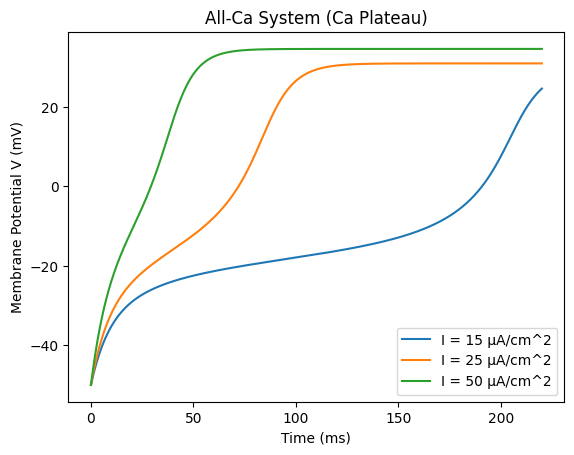

In [8]:
# replicate Figure 3b
def run_simulation1(n_timesteps, dt, Cm, gL, gCa, gK, V_0, m_0, n_0, I):

  ECa=100 # mv Na reversal potential
  EK=-70 # mv K reversal potential
  EL=-35 # mv leak reversal potential


  V = np.zeros(t.shape)
  m = np.zeros(t.shape)
  n = np.zeros(t.shape)

  V[0]=V_0
  m[0]=m_0  
  n[0]=n_0

  Ca_in=0 # intracellular Ca concentration
  Ca_out=100 # extracellualr Ca concentration
 
  for i in range(n_timesteps-1):
      gL = gL
      # I = g*driving force
      IL = gL * (V[i] - EL) # leak current
      ICa = gCa * m[i] * (V[i]*(1-(Ca_in/Ca_out)*np.exp(V[i]/12.5)))/(1-np.exp(V[i]/12.5)) # Ca current, with considering electrodiffusion



      IK = gK * n[i] * (V[i]-EK) # K current

      #Euler method to find the next voltage value
      Vdot = (1/Cm) * (I[i] - (ICa + IK + IL)) # changing rate of V
      V[i+1] = V[i] + dt * Vdot # Euler's method

      mdot = lambda_m(V[i])*(m_inf(V[i]) - m[i])
      m[i+1] = m[i] + dt * mdot
      ndot = lambda_n(V[i])*(n_inf(V[i]) - n[i])
      n[i+1] = n[i] + dt * ndot

  return V, m, n





gCa=40
gK=0
gL=2
lambda_m_bar = 0.1
v1=10
v2=15
I = np.zeros(t.shape) + 15
V, m, n = run_simulation1(n_timesteps, dt, Cm, gL, gCa, gK, V_0, m_0, n_0, I)
plt.plot(t, V, label="I = 15 µA/cm^2")
plt.title("All-Ca System (Ca Plateau)")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential V (mV)")
plt.legend()

I = np.zeros(t.shape) + 25
V, m, n = run_simulation1(n_timesteps, dt, Cm, gL, gCa, gK, V_0, m_0, n_0, I)
plt.plot(t, V, label="I = 25 µA/cm^2")
plt.legend()

I = np.zeros(t.shape) + 50
V, m, n = run_simulation1(n_timesteps, dt, Cm, gL, gCa, gK, V_0, m_0, n_0, I)
plt.plot(t, V, label="I = 50 µA/cm^2")
plt.legend()

plt.show()



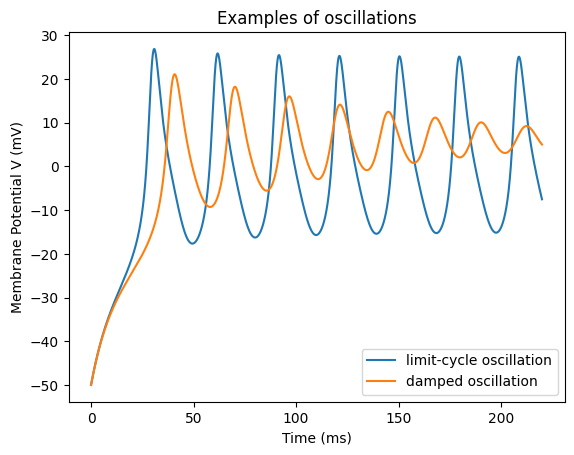

In [9]:
# replicate Figure 6
I = np.zeros(t.shape) + 50 # injected current is set to be 50 µA/cm^2
# tunning parameters (mV)
v1=0
v2=15
v3=10
v4=10
# rate constant (s^-1)
lambda_m_bar = 1
lambda_n_bar = 0.1


gCa=6 # instantaneous Ca conductance (mmho/cm^2)
gK=12 # instantaneous K conductance (mmho/cm^2)
gL=2 # instantaneous leak conductance (mmho/cm^2)
V, m, n = run_simulation(n_timesteps, dt, Cm, gL, gCa, gK, V_0, m_0, n_0, I)
plt.plot(t, V, label="limit-cycle oscillation")
plt.title("Examples of oscillations")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential V (mV)")
plt.legend()


gCa=4 # instantaneous Ca conductance (mmho/cm^2)
gK=8 # instantaneous K conductance (mmho/cm^2)
V, m, n = run_simulation(n_timesteps, dt, Cm, gL, gCa, gK, V_0, m_0, n_0, I)
plt.plot(t, V,label="damped oscillation")
plt.legend()

plt.show()

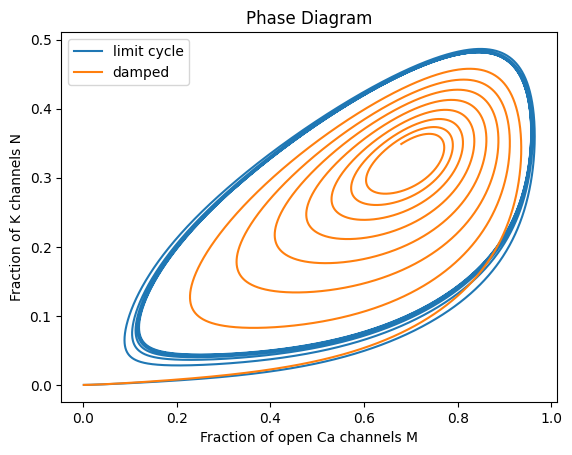

In [10]:
# phase diagram of limit cycle and damped oscillation in Figure 6
I = np.zeros(t.shape) + 50 # injected current is set to be 50 µA/cm^2
# tunning parameters (mV)
v1=0
v2=15
v3=10
v4=10
# rate constant (s^-1)
lambda_m_bar = 1
lambda_n_bar = 0.1


gCa=6 # instantaneous Ca conductance (mmho/cm^2)
gK=12 # instantaneous K conductance (mmho/cm^2)
gL=2 # instantaneous leak conductance (mmho/cm^2)
V, m, n = run_simulation(n_timesteps, dt, Cm, gL, gCa, gK, V_0, m_0, n_0, I)
plt.plot(m,n, label="limit cycle")
plt.title("Phase Diagram")
plt.xlabel("Fraction of open Ca channels M")
plt.ylabel("Fraction of K channels N")
plt.legend()

gCa=4 # instantaneous Ca conductance (mmho/cm^2)
gK=8 # instantaneous K conductance (mmho/cm^2)
V, m, n = run_simulation(n_timesteps, dt, Cm, gL, gCa, gK, V_0, m_0, n_0, I)
plt.plot(m,n, label="damped")
plt.legend()

plt.show()



In [11]:
# V,N reduced system (Ca system is assumed to be so much faster than K system --> m = m_inf)
def run_simulation2(n_timesteps, dt, Cm, gL, gCa, gK, V_0, m_0, n_0, I):

  ECa=100 # mv Na reversal potential
  EK=-70 # mv K reversal potential
  EL=-50 # mv leak reversal potential


  V = np.zeros(t.shape)
  n = np.zeros(t.shape)

  V[0]=V_0 
  n[0]=n_0
 
  for i in range(n_timesteps-1):
      # I = g*driving force
      IL = gL * (V[i] - EL) # leak current
      ICa = gCa * m_inf(V[i]) * (V[i] - ECa) # Ca current
      IK = gK * n[i] * (V[i] - EK) # K current

      #Euler method to find the next voltage value
      Vdot = (1/Cm) * (I[i] - (ICa + IK + IL)) # changing rate of V
      V[i+1] = V[i] + dt * Vdot # Euler's method

      ndot = lambda_n(V[i])*(n_inf(V[i]) - n[i])
      n[i+1] = n[i] + dt * ndot

  return V, n, m

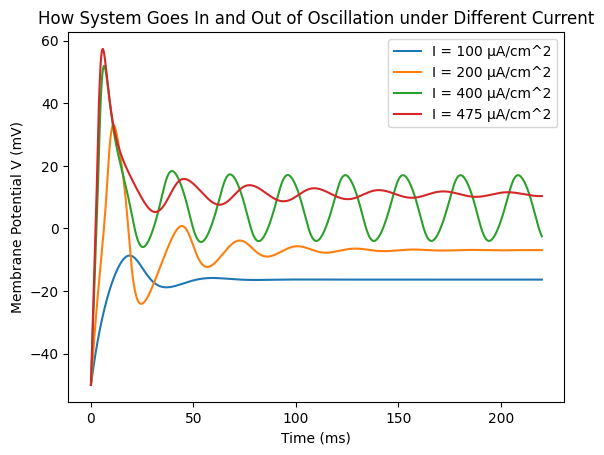

In [12]:
# replicate Figure 9 using the V,N reduced system
Cm=20  # membrane capacitance (µF/cm^2)
dt=0.01 # Time Step ms
T = 220 # overall simulation time
t=np.arange(0, T+dt, dt) # Time Array ms
n_timesteps = len(t)

gL=2 # instantaneous leak conductance (mmho/cm^2)
gCa=4 # instantaneous Ca conductance (mmho/cm^2)
gK=8 # instantaneous K conductance (mmho/cm^2)

# tunning parameters (mV)
v1=10
v2=15 # after searching for multiple literatures, "V2=-15 mV" in the Figure 9 caption is a typo, V2 should be set to 15 mV
v3=-1
v4=14.5

# rate constant (s^-1)
lambda_m_bar = 0.1
lambda_n_bar = 1/15

# initial values
V_0 = -50 # resting potential (mV)
m_0 = m_inf(V_0) # initial fraction of open Ca channels
n_0 = n_inf(V_0) # initial fraction of open K channels


I = np.zeros(t.shape) + 100 # injected current (µA/cm^2)
V, n,m = run_simulation2(n_timesteps, dt, Cm, gL, gCa, gK, V_0, m_0, n_0, I)
plt.plot(t, V, label="I = 100 µA/cm^2")
plt.title("How System Goes In and Out of Oscillation under Different Current")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential V (mV)")
plt.legend()

I = np.zeros(t.shape) + 200
V, n,m = run_simulation2(n_timesteps, dt, Cm, gL, gCa, gK, V_0, m_0, n_0, I)
plt.plot(t, V, label="I = 200 µA/cm^2")
plt.legend()

I = np.zeros(t.shape) + 400
V, n,m = run_simulation2(n_timesteps, dt, Cm, gL, gCa, gK, V_0, m_0, n_0, I)
plt.plot(t, V, label="I = 400 µA/cm^2")
plt.legend()

I = np.zeros(t.shape) + 475
V, n,m = run_simulation2(n_timesteps, dt, Cm, gL, gCa, gK, V_0, m_0, n_0, I)
plt.plot(t, V, label="I = 475 µA/cm^2")
plt.legend()

plt.show()



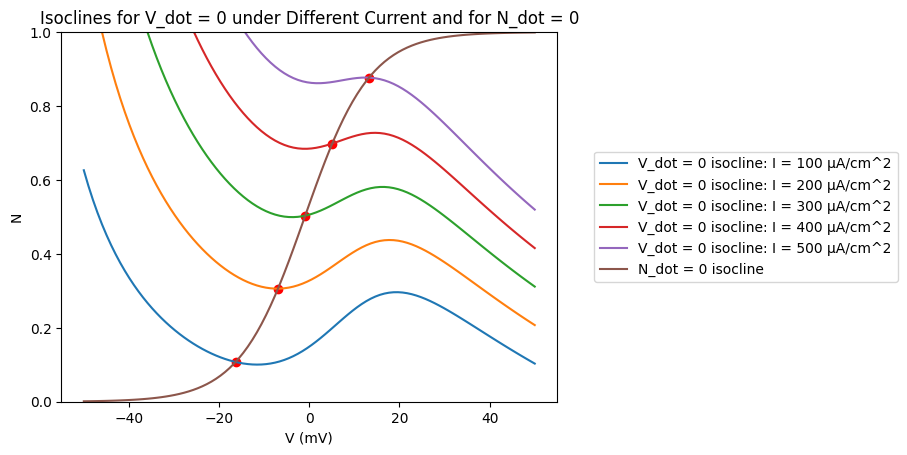

In [13]:
# graphing nullclines of Figure 9
def nullcline(V, Cm, gL, gCa, gK, I):
  ECa=100 # mv Na reversal potential
  EK=-70 # mv K reversal potential
  EL=-50 # mv leak reversal potential

  nullcline_Vdot_is_0 = np.zeros(100)
  for i in range(len(V)):
    IL = gL * (V[i] - EL) 
    ICa = gCa * m_inf(V[i]) * (V[i] - ECa)
    nullcline_Vdot_is_0[i] = (I-IL-ICa)/(gK*(V[i]-EK)) # this is the V_dot nullcline where V_dot = 0
  
  return nullcline_Vdot_is_0

V = np.linspace(-50, 50, 100)
plt.plot(V, nullcline(V, Cm, gL, gCa, gK, 100), label="V_dot = 0 isocline: I = 100 µA/cm^2")
plt.legend(loc='center right', bbox_to_anchor=(1.7, 0.5))
plt.plot(V, nullcline(V, Cm, gL, gCa, gK, 200), label="V_dot = 0 isocline: I = 200 µA/cm^2")
plt.legend(loc='center right', bbox_to_anchor=(1.7, 0.5))
plt.plot(V, nullcline(V, Cm, gL, gCa, gK, 300), label="V_dot = 0 isocline: I = 300 µA/cm^2")
plt.legend(loc='center right', bbox_to_anchor=(1.7, 0.5))
plt.plot(V, nullcline(V, Cm, gL, gCa, gK, 400), label="V_dot = 0 isocline: I = 400 µA/cm^2")
plt.legend(loc='center right', bbox_to_anchor=(1.7, 0.5))
plt.plot(V, nullcline(V, Cm, gL, gCa, gK, 500), label="V_dot = 0 isocline: I = 500 µA/cm^2")
plt.legend(loc='center right', bbox_to_anchor=(1.7, 0.5))
plt.plot(V, n_inf(V), label="N_dot = 0 isocline") # this is the N_dot nullcline where N_dot = 0
plt.legend(loc='center right', bbox_to_anchor=(1.7, 0.5))
plt.ylim(0,1)
plt.xlabel("V (mV)")
plt.ylabel("N")
plt.title("Isoclines for V_dot = 0 under Different Current and for N_dot = 0")

# the intersections are calculated using the fsolve() function in the last block of code
plt.scatter(-16.34182341978527, 0.10754050369761366, color='red', marker='o')
plt.scatter(-6.938470174002636, 0.30595487965106544, color='red', marker='o')
plt.scatter(-0.901614094510413, 0.5033925653669297, color='red', marker='o')
plt.scatter(5.093435120824325, 0.6985649964314553, color='red', marker='o')
plt.scatter(13.235103297041686, 0.8769071886319217, color='red', marker='o')

plt.show()





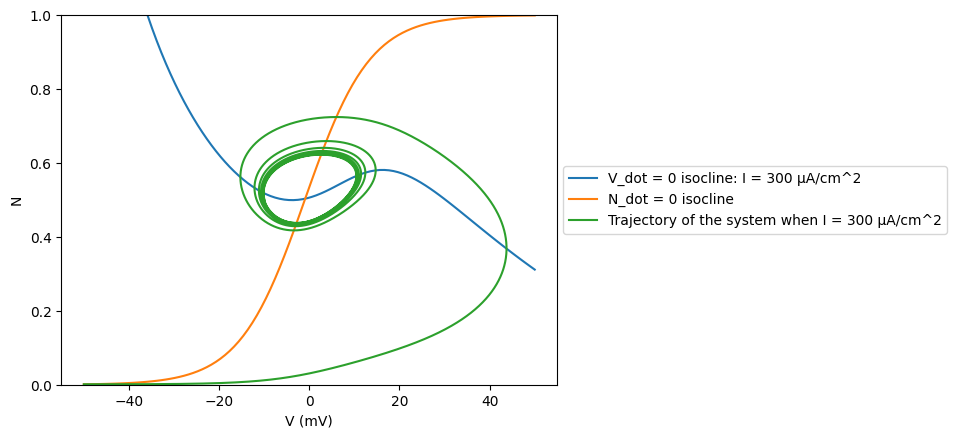

In [14]:
# replicate Figure 7
# graphing nullclines in V, N that give a stable limit cycle (stable oscillation)
V = np.linspace(-50, 50, 100)
plt.plot(V, nullcline(V, Cm, gL, gCa, gK, 300), label="V_dot = 0 isocline: I = 300 µA/cm^2")
plt.legend(loc='center right', bbox_to_anchor=(1.8, 0.5))
plt.plot(V, n_inf(V), label="N_dot = 0 isocline")
plt.legend(loc='center right', bbox_to_anchor=(1.8, 0.5))
plt.ylim(0,1)
plt.xlabel("V (mV)")
plt.ylabel("N")

I = np.zeros(t.shape) + 300
V, n,m = run_simulation2(n_timesteps, dt, Cm, gL, gCa, gK, V_0, m_0, n_0, I)
plt.plot(V, n, label="Trajectory of the system when I = 300 µA/cm^2")
plt.legend(loc='center right', bbox_to_anchor=(1.8, 0.5))
plt.show()
# the point at the intesection of the nullclines is an unstable node (unstable equalibrium gives a stable (limit cycle) oscillation)

Eigenvalues: [-0.10201068 -0.18387135]
Eigenvalue: -0.10201068483296098
Real part: -0.10201068483296098
Imaginary part: 0.0
Eigenvalue: -0.18387134852466022
Real part: -0.18387134852466022
Imaginary part: 0.0


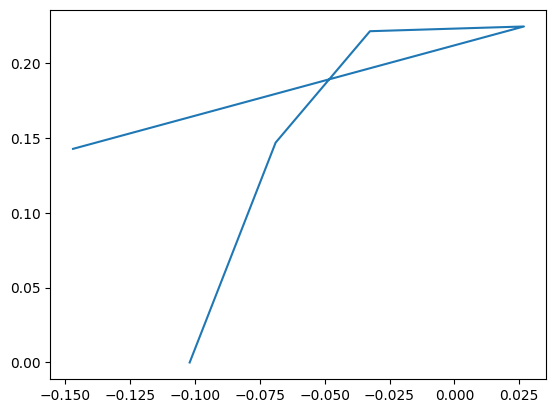

In [15]:
# replicate Figure 8, which is the plot of real and imaginary parts of eigenvalue of the V,N reduced system
from scipy.optimize import fsolve
import sympy as sp

Cm=20  # membrane capacitance (µF/cm^2)
gL=2 # instantaneous leak conductance (mmho/cm^2)
gCa=4 # instantaneous Ca conductance (mmho/cm^2)
gK=8 # instantaneous K conductance (mmho/cm^2)
# tunning parameters (mV)
v1=10
v2=15 
v3=-1
v4=14.5
# rate constant (s^-1)
lambda_m_bar = 0.1
lambda_n_bar = 1/15

def dvdt(v, n):
  ECa=100 # mv Na reversal potential
  EK=-70 # mv K reversal potential
  EL=-50 # mv leak reversal potential
  IL = gL * (v - EL) # leak current
  ICa = gCa * (m_inf(v)) * (v - ECa) # Ca current
  IK = gK * n * (v - EK) # K current
  Vdot = (1/Cm) * (I - (ICa + IK + IL)) # changing rate of V
  return Vdot
def dndt(v,n):
  ndot = lambda_n(v)*(n_inf(v) - n)
  return ndot

def equations(x):
    v, n = x
    return [dvdt(v, n), dndt(v, n)]



I=0
v_ss, n_ss = fsolve(equations, [0.1, 0.1]) # the steady state points are proved to be correct, shown in the red dots in the graph named "Isoclines for V_dot = 0 under Different Current and for N_dot = 0"

v, n = sp.symbols('v n')
f = (1/Cm)*(I - (gL * (v - (-50))) - (gCa * (0.5*(1 + sp.tanh((v - v1)/v2))) * (v - 100)) - (gK * n * (v - (-70))))
g = (lambda_n_bar * sp.cosh((v - v3)/(2*v4)))*((0.5*(1 + sp.tanh((v - v3)/v4)))-n)
df_dv = sp.diff(f, v)
df_dn = sp.diff(f, n)
dg_dv = sp.diff(g, v)
dg_dn = sp.diff(g, n)
v0 = v_ss
n0 = n_ss
J = sp.Matrix([[df_dv.subs({v: v0, n: n0}), df_dn.subs({v: v0, n: n0})],
               [dg_dv.subs({v: v0, n: n0}), dg_dn.subs({v: v0, n: n0})]])
J_np = np.array(J, dtype=float)
eigenvalues = np.linalg.eigvals(J_np)
print("Eigenvalues:", eigenvalues)
for eigenvalue in eigenvalues:
    print("Eigenvalue:", eigenvalue)
    print("Real part:", np.real(eigenvalue))
    print("Imaginary part:", np.imag(eigenvalue))

# try different I = 0, 100, 200, 400, 550
real = [-0.10201068, -0.06888129,-0.03253748,0.0267929, -0.14696024]
imaginary = [0, 0.14697394,0.22142187,0.22458149, 0.14278679]

plt.plot(real, imaginary)
# we generate the rough graph of Figure 8


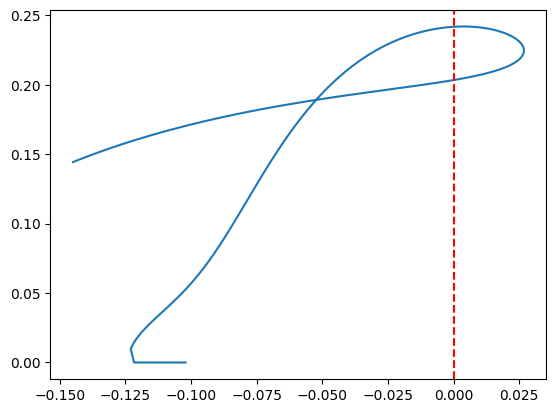

In [16]:
# refine the graph to make it look nicer (more similar to Figure 8)
I = np.arange(0, 550, 1)
real = np.zeros(I.shape)
imaginary = np.zeros(I.shape)
for i in range(len(I)):
  def dvdt(v, n):
    ECa=100 # mv Na reversal potential
    EK=-70 # mv K reversal potential
    EL=-50 # mv leak reversal potential
    IL = gL * (v - EL) # leak current
    ICa = gCa * (m_inf(v)) * (v - ECa) # Ca current
    IK = gK * n * (v - EK) # K current
    Vdot = (1/Cm) * (I[i] - (ICa + IK + IL)) # changing rate of V
    return Vdot
  def dndt(v,n):
    ndot = lambda_n(v)*(n_inf(v) - n)
    return ndot

  def equations(x):
      v, n = x
      return [dvdt(v, n), dndt(v, n)]
  v_ss, n_ss = fsolve(equations, [0.1, 0.1]) # the steady state points are proved to be correct, shown in the red dots in the graph named "Isoclines for V_dot = 0 under Different Current and for N_dot = 0"

  v, n = sp.symbols('v n')
  f = (1/Cm)*(I[i] - (gL * (v - (-50))) - (gCa * (0.5*(1 + sp.tanh((v - v1)/v2))) * (v - 100)) - (gK * n * (v - (-70))))
  g = (lambda_n_bar * sp.cosh((v - v3)/(2*v4)))*((0.5*(1 + sp.tanh((v - v3)/v4)))-n)
  df_dv = sp.diff(f, v)
  df_dn = sp.diff(f, n)
  dg_dv = sp.diff(g, v)
  dg_dn = sp.diff(g, n)
  v0 = v_ss
  n0 = n_ss
  J = sp.Matrix([[df_dv.subs({v: v0, n: n0}), df_dn.subs({v: v0, n: n0})],
                [dg_dv.subs({v: v0, n: n0}), dg_dn.subs({v: v0, n: n0})]])
  J_np = np.array(J, dtype=float)
  eigenvalues = np.linalg.eigvals(J_np)
  real[i] = np.real(eigenvalues[0])
  imaginary[i] = np.imag(eigenvalues[0])

plt.plot(real, imaginary)
plt.axvline(x=0, color='r', linestyle='--')

(-0.15, 0.05)

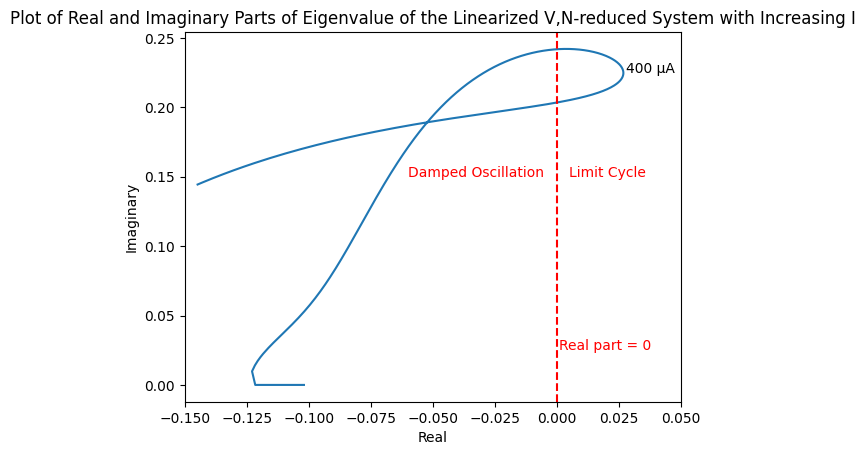

In [54]:
plt.plot(real, imaginary)
plt.axvline(x=0, color='r', linestyle='--', label="real part = 0")
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.title("Plot of Real and Imaginary Parts of Eigenvalue of the Linearized V,N-reduced System with Increasing I")
plt.text(-0.060, 0.15, "Damped Oscillation",fontsize=10, color='red')
plt.text(0.005, 0.15, "Limit Cycle",fontsize=10, color='red')
plt.text(0.001, 0.025, "Real part = 0", fontsize=10, color="red")
plt.text(0.028, 0.225, "400 µA")
plt.xlim(-0.15, 0.05)